In [28]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [29]:
# Load the crypto_data.csv dataset.
file_path = "./resources/listings_cleaned2.csv"
df = pd.read_csv(file_path,index_col=0)
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,...,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days_active,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,
958,7/31/2008,within a few hours,100%,1,1,1,1,Western Addition,Apartment,Entire home/apt,...,9.0,1,1,1,0,0,1.60,3958,4+ years,17
7918,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,Apartment,Private room,...,8.0,0,9,0,9,0,0.14,3637,4+ years,923
8142,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,Apartment,Private room,...,9.0,0,9,0,9,0,0.14,3637,4+ years,263
8339,7/2/2009,within an hour,100%,0,2,2,1,Western Addition,House,Entire home/apt,...,9.0,0,2,2,0,0,0.23,3622,4+ years,295
8739,1/27/2009,within an hour,100%,1,2,2,0,Mission,Other,Private room,...,10.0,1,2,0,2,0,5.61,3778,4+ years,12


In [30]:
# Replace nulls with 'unknown'
df.time_since_first_review.replace('nan', 'unknown', inplace=True)

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = sf_df.copy()
cols = ['property_type','price']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,...,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days_active,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,
958,7/31/2008,within a few hours,100%,1,1,1,1,Western Addition,0,Entire home/apt,...,9.0,1,1,1,0,0,1.60,3958,4+ years,17
7918,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,0,Private room,...,8.0,0,9,0,9,0,0.14,3637,4+ years,923
8142,6/17/2009,within a few hours,100%,0,10,10,1,Haight Ashbury,0,Private room,...,9.0,0,9,0,9,0,0.14,3637,4+ years,263
8339,7/2/2009,within an hour,100%,0,2,2,1,Western Addition,1,Entire home/apt,...,9.0,0,2,2,0,0,0.23,3622,4+ years,295
8739,1/27/2009,within an hour,100%,1,2,2,0,Mission,2,Private room,...,10.0,1,2,0,2,0,5.61,3778,4+ years,12


In [32]:
df_encoded = pd.get_dummies(df, columns=['host_response_rate','property_type','price' ])
df_encoded.head()

,host_since,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bathrooms,...,price_590,price_591,price_592,price_593,price_594,price_595,price_596,price_597,price_598,price_599
id,,,,,,,,,,,,,,,,,,,,,
958,7/31/2008,within a few hours,1,1,1,1,Western Addition,Entire home/apt,3,1,...,0,0,0,0,0,0,0,0,0,0
7918,6/17/2009,within a few hours,0,10,10,1,Haight Ashbury,Private room,2,4,...,0,0,0,0,0,0,0,0,0,0
8142,6/17/2009,within a few hours,0,10,10,1,Haight Ashbury,Private room,2,4,...,0,0,0,0,0,0,0,0,0,0
8339,7/2/2009,within an hour,0,2,2,1,Western Addition,Entire home/apt,5,1.5,...,0,0,0,0,0,0,0,0,0,0
8739,1/27/2009,within an hour,1,2,2,0,Mission,Private room,3,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_encoded.describe()

,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,...,price_590,price_591,price_592,price_593,price_594,price_595,price_596,price_597,price_598,price_599
count,10153.000000,10153.000000,10153.000000,10153.000000,10153.000000,9425.000000,9972.000000,1.015300e+04,1.015300e+04,10153.000000,...,10153.000000,10153.000000,10153.000000,10153.000000,10153.000000,10153.000000,10153.000000,10153.000000,10153.000000,10153.000000
mean,0.508618,35.736827,35.736827,0.746085,3.222299,1.449655,1.821400,9.864565e+03,1.031912e+04,7.713582,...,0.000098,0.000197,0.000098,0.000098,0.000098,0.000098,0.000197,0.000098,0.000098,0.000098
std,0.499950,185.959874,185.959874,0.435271,1.916841,0.903819,1.214483,9.924365e+05,9.924327e+05,9.936357,...,0.009924,0.014034,0.009924,0.009924,0.009924,0.009924,0.014034,0.009924,0.009924,0.009924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.000000e+00,2.800000e+01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000e+00,1.200000e+02,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,5.000000,1.000000,4.000000,2.000000,2.000000,3.000000e+01,1.125000e+03,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1987.000000,1987.000000,1.000000,16.000000,14.000000,14.000000,1.000000e+08,1.000000e+08,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


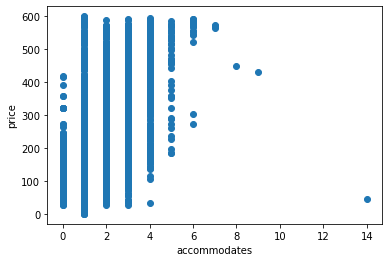

In [34]:
plt.scatter(sf_df.bedrooms, df.price)
plt.xlabel('accommodates')
plt.ylabel('price')
plt.show()

In [35]:
# The first argument of reshape() specifies the number of rows. Here, the argument is -1, and means that the number of rows is unspecified. Accordingly, the NumPy library will automatically identify the number of rows in the dataset.
# The second argument of reshape() refers to the number of columns. Here, the argument is 1, meaning that there is only one column of independent variables.
X = df.price.values.reshape(-1, 1)

In [36]:
# we examine the first five entries in X, we see that the output is a two-dimensional NumPy array:
X[:5]

array([[146],
       [ 41],
       [ 41],
       [478],
       [115]], dtype=int64)

In [37]:
# When we examine the shape of X, we see that there are 30 rows and 1 column:
X.shape

(10153, 1)

In [38]:
# assign the target variable, or the Salary column, to y
y = df.accommodates

In [39]:
# The next step is to create an instance of the linear regression model. An object is instantiated, or created, from sklearn.linear_model's LinearRegression class. Instantiation here means that the LinearRegression class is like a template that contains the algorithms required to perform linear regression. From this template, a specific object called model is created that will analyze the data and store information specific to this dataset:
model = LinearRegression()

In [40]:
# After a model is instantiated, it will analyze the data and attempt to learn patterns in the data. This learning stage is alternatively called fitting or training:
model.fit(X, y)

LinearRegression()

In [41]:
# After the learning stage, the predict() method is used to generate predictions: given any number of bedrooms, the model will predict accomodation:
y_pred = model.predict(X)
print(y_pred.shape)


(10153,)


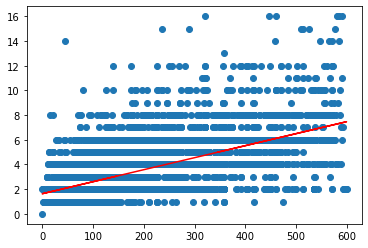

In [42]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [21]:
# The best fit line is in red, drawn through the predictions. The maximum value of bedrooms in the current dataset is 14.

In [22]:
# Finally, we can examine the specific parameters of our model: the slope and the y-intercept. The slope is represented by model.coef_, and model.intercept_ is the y-intercept:

In [43]:
print(model.coef_)
print(model.intercept_)

[0.00973538]
1.6323994721060227


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [46]:
classifier.fit(X_train, y_train)

C:\anaconda\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [47]:
from sklearn.pipeline import make_pipeline

In [49]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [50]:
pipe.fit(X_train, y_train)

C:\anaconda\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [51]:
pipe.score(X_test, y_test)

0.5001969279243796